In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [3]:
class my_PCA():
    def __init__(self, n_components=None):
        self.n_components = n_components

    def fit(self, X):
        # Aplanar las imágenes si tienen más de dos dimensiones
        if X.ndim > 2:
            X = X.reshape(X.shape[0], -1)
        
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)  # Asegurando que las variables estén en columnas
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors

    def transform(self, X):
        if X.ndim > 2:
            X = X.reshape(X.shape[0], -1)
        
        X_centered = X - self.mean
        projected_data = np.dot(X_centered, self.eigenvectors)
        if self.n_components:
            return projected_data[:, :self.n_components]
        else:
            return projected_data

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def draw_cool_graphs(self):
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))
        ax[0].set_title("Eigenvalues")
        ax[0].set_xlabel('Principal Component Number')
        ax[0].set_ylabel('Value')
        ax[0].scatter(range(len(self.eigenvalues)), self.eigenvalues)
        
        cum_sum = np.cumsum(self.eigenvalues / np.sum(self.eigenvalues) * 100)
        ax[1].set_title("Cumulative sums")
        ax[1].set_xlabel('Principal Component Quantity')
        ax[1].set_ylabel('% of explanation')
        ax[1].plot(range(len(cum_sum)), cum_sum)
        plt.show()

In [4]:
class my_kNN():
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for sample in X:
            distances = np.sqrt(np.sum((self.X_train - sample)**2, axis=1))
            nearest_neighbors = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_neighbors]
            unique, counts = np.unique(nearest_labels, return_counts=True)
            predicted_label = unique[np.argmax(counts)]
            y_pred.append(predicted_label)
        return np.array(y_pred)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train[0], train[1], test_size=0.2, random_state=42)

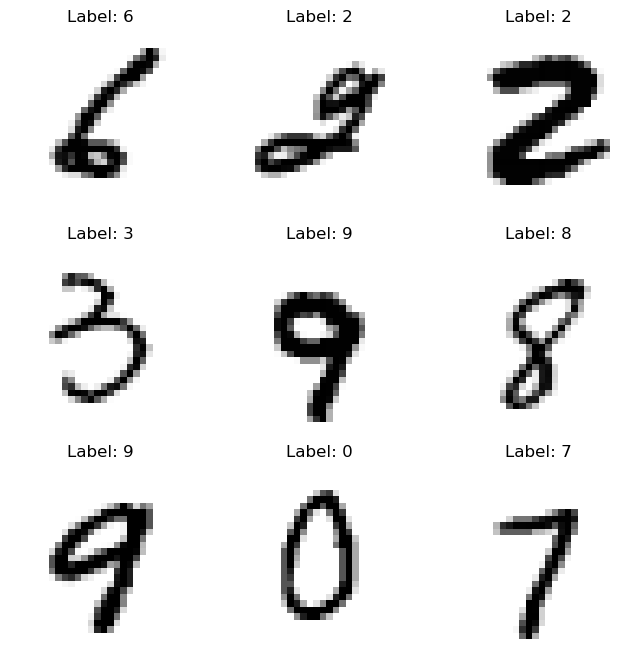

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='binary')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.show()

In [7]:
pca = my_PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

C:\Users\saras\anaconda3\Lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


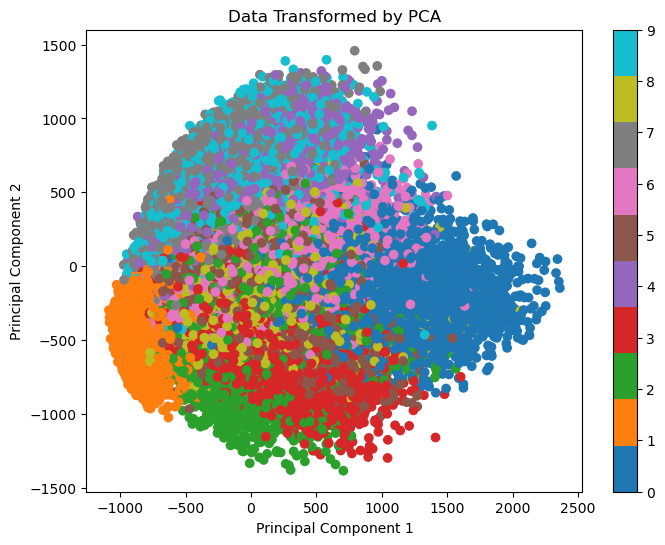

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Transformed by PCA')
plt.colorbar()
plt.show()

C:\Users\saras\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


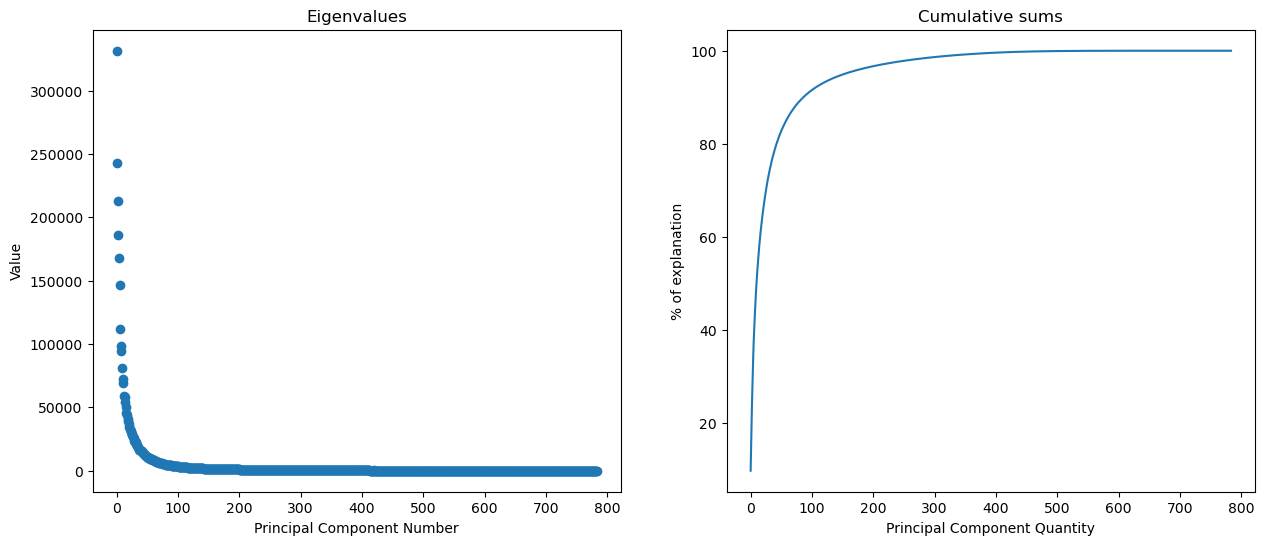

In [9]:
pca.draw_cool_graphs()